# Lesson 2 - Getting Started

The purpose of this lesson is to try out some of the basics and get a feel for the Device Framework. We'll dig deeper into these concepts in Lesson 3.


## Configuration Trees

Device Framwork works differently than most firewall API tools because it models the API into objects much like the GUI does. For example, you might be used to working with an XPath to an address object like this:

`/config/devices/entry[@name="localhost.localdomain"]/vsys/entry[@name="vsys1"]/address/entry[@name="MyAddress"]`

Instead, Device Framwork uses objects in python, so the above xpath would be an object you create like this:

`myaddress = objects.AddressObject('MyAddress')`

Much shorter and easier to use in python!

When you combine these objects into a hierarchy, then you get a tree called the **Configuration Tree**.  The configuration tree is a representation of a firewall's configuration using a tree of objects in memory.

Let's look at an example. Run the following code cells using the <button class="btn btn-default btn-xs"><i class="fa-step-forward fa"></i><span class="toolbar-btn-label">Run</span></button> button or `Shift-Enter`.

**Step 1: Import the pandevice lessons**  
You installed the Device Framework (pandevice) library in [Lesson 1](Lesson 1 - Introduction.ipynb). Now you need to import the lessons from the library into memory. Lessons in the library are generally named for the tabs at the top of the Firewall and Panorama GUI. We'll import the **firewall** and **objects** lessons for now.

In [5]:
from pandevice import firewall, objects

**Step 2: Create a config tree**  
Create a couple objects and put them in a simple tree

In [6]:
# Create a firewall object and an address object
fw = firewall.Firewall('10.30.11.101', 'admin', 'Ignite18')
apache = objects.AddressObject('ApacheServer', '5.5.5.5', description="My Web Server")

# Now make the address object a child of the firewall object using add()
fw.add(apache)

<AddressObject ApacheServer 0x7f32a8763d68>

The output of this cell is the `ApacheServer` address object. Remember that the last command in a cell is shown as the output of that cell.  In this case, the last command is `fw.add(apache)`. This command returns the object that was added, which is why the output is the `ApacheServer` object.

**Step 3: Display the config tree**  
Let's see that configuration tree we just created using the tree method.

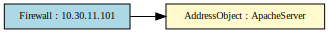

In [7]:
fw.tree()

You should see a configuration tree with two objects that looks like this:

![First object tree](.images/validate-first-tree.png)


Firewall is the **root** object, and the **parent** of the AddressObject.  The AddressObject is the **child** of the Firewall object.

You can see the parameters in an object using the `about()` method.

In [8]:
apache.about()

{'value': '5.5.5.5',
 'type': 'ip-netmask',
 'description': 'My Web Server',
 'tag': None,
 'name': 'ApacheServer'}

Connect to the firewall GUI using the student portal and login. In the firewall GUI, navigate to **Objects -> Address** and notice the ApacheServer object isn't there yet.  That's because the configuration tree we created is in memory in python only. It hasn't been sent to the firewall yet.  Let's do that next.

In [ ]:
apache.create()

Now check the firewall GUI again and click the refresh button (see screenshot) to see the newly created object.

![Refresh Button](.images/refresh-button.png)

## API Reference Documentation

The [Device Framwork API Reference](http://pandevice.readthedocs.io) is an invaluable tool when using Device Framework for automation. It gives you information on all the parameters and [relationships between all the objects](http://pandevice.readthedocs.io/en/latest/configtree.html) in the library.

You can access the documentation right here from the notebook in two easy ways:

**1. In a configuration tree, click one of the objects.** Try this now on the config tree you displayed in the last section above. It will link to the documentation for that object.

**2. Press `Shift-Tab` 2 times for pop-up documentation**, or 4 times for a panel with documentation while editing an object in python.  Try this now on the next cell.

In [ ]:
# Click on the text 'AddressObject()' on the next line of code
# to move the cursor onto it, then press Shift-Tab twice.
obj = objects.AddressObject()

## Exercise 1: Create an Address Object

Create an address object using the techniques you learned in this lesson. You can name it anything you want, but make sure it is an **fqdn** type object with the value `facebook.com`. It should have a **description** of 'Social media'. Once the address object is in python, create it on the live firewall to complete this exercise.

Hint: Use the API Reference Documentation or the `Shift-Tab` trick from the last section to figure out how to create an fqdn type address object.

In [ ]:
fw = firewall.Firewall('10.30.11.101', 'admin', 'Ignite18')
facebook = objects.AddressObject('My-Facebook-object',
                                 'facebook.com',
                                 type='fqdn',
                                 description='Social media')
fw.add(facebook)
facebook.create()

In [ ]:
# Exercise 1 answer here...


## Next step

You've got the basics, now lets have some fun. Continue to [Lesson 3 - Configure and Commit](Lesson 3 - Configure and Commit.ipynb) to push some complex configuration and commit it.